In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(".\Excel files\IPL Matches.csv")

print(df.info)
print(df.head())
print(df.dtypes)

#Finding no of null values and unique values
print("No of null values",df.isnull().sum())
print(df.nunique())

#Dropping columns that are not going to be used
df = df.drop(columns = ["method","umpire1","umpire2"], axis=1)
df = df.dropna()

#Replacing duplicate values for venues
df['venue'] = df['venue'].str.strip()
df['venue'] = df['venue'].replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')
df['venue'] = df['venue'].replace("Punjab Cricket Association IS Bindra Stadium, Mohali","Punjab Cricket Association Stadium, Mohali")
df['venue'] = df['venue'].str.split(',').str.get(0)

#checking unique values for venue
print(df.groupby('venue')['venue'].agg('count'))

<bound method DataFrame.info of           id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                              

In [181]:
print(df.head())

       id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                venue  neutral_venue  \
0               M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium              0   
2                    Feroz Shah Kotla              0   
3                    Wankhede Stadium              0   
4                        Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Rider

In [182]:
#Creating dataframe for number of matches played by a team
matches_played = df[['team1','team2']].stack().value_counts()
print(matches_played)

Mumbai Indians                 195
Kolkata Knight Riders          186
Royal Challengers Bangalore    185
Kings XI Punjab                183
Chennai Super Kings            174
Delhi Daredevils               154
Rajasthan Royals               154
Sunrisers Hyderabad            117
Deccan Chargers                 75
Pune Warriors                   45
Delhi Capitals                  31
Gujarat Lions                   29
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64


In [183]:
#Creating dataframe for number of matches won by a team
winners = df.groupby('winner')['winner'].agg('count').sort_values(ascending=False)

In [184]:
#Creating dataframe for number of times a team won when they won the toss
df1 = df[df['toss_winner'] == df['winner']]
toss_winner = df1.groupby('winner')['winner'].agg('count').sort_values(ascending=False)
toss_winner

winner
Chennai Super Kings            61
Mumbai Indians                 60
Kolkata Knight Riders          55
Rajasthan Royals               43
Royal Challengers Bangalore    40
Delhi Daredevils               35
Kings XI Punjab                33
Sunrisers Hyderabad            28
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  9
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [185]:
#Creating dataframe with all the data of a team: matches played, matches won, and matches won where the toss was also won
result = [matches_played, winners, toss_winner]
team_data = pd.concat(result,axis=1)
team_data.columns = ['matches_played','matches_won','toss_and_match_won']
print(team_data)

                             matches_played  matches_won  toss_and_match_won
Mumbai Indians                          195          118                  60
Kolkata Knight Riders                   186           97                  55
Royal Challengers Bangalore             185           87                  40
Kings XI Punjab                         183           82                  33
Chennai Super Kings                     174          103                  61
Delhi Daredevils                        154           65                  35
Rajasthan Royals                        154           79                  43
Sunrisers Hyderabad                     117           63                  28
Deccan Chargers                          75           29                  19
Pune Warriors                            45           12                   3
Delhi Capitals                           31           17                   9
Gujarat Lions                            29           13                  10

                                         winner  count
venue                                                 
Barabati Stadium                Deccan Chargers      3
Brabourne Stadium                Mumbai Indians      6
Buffalo Park                Chennai Super Kings      1
De Beers Diamond Oval       Chennai Super Kings      1
Dr DY Patil Sports Academy       Mumbai Indians      5


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Chennai Super Kings'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab')])

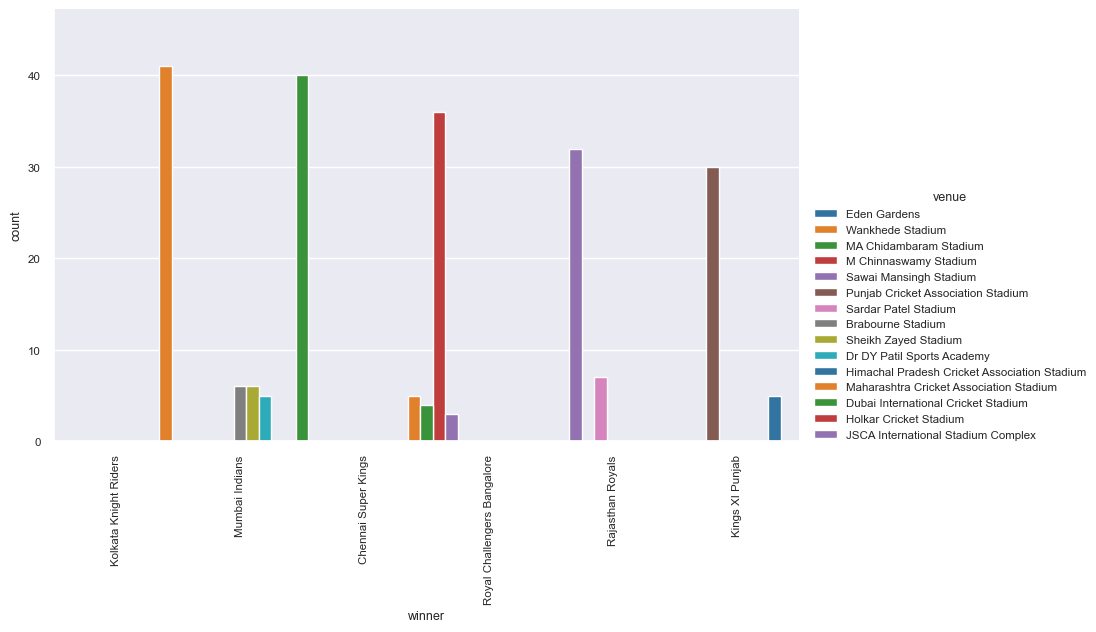

In [203]:
#Graph of teams having the most wins in different stadiums
#Not to plot
import matplotlib.pyplot as plt

df6 = df.groupby(['venue','winner'])['winner'].agg(['count']).sort_values(['venue','count'],ascending = (True,False))
df6 = df6.reset_index()
df6 = df6.groupby('venue').first()
print(df6.head())

df6 = df6[df6['winner'].isin(['Chennai Super Kings','Mumbai Indians','Royal Challengers Bangalore','Kings XI Punjab','Kolkata Knight Riders','Gujarat Lions','Rajasthan Royals'])]
#Taking only the 1st 10 values
df6 = df6.sort_values('count',ascending = False).head(15)

barplot = sns.catplot(data = df6, x='winner', y='count', hue = 'venue', palette = 'tab10', kind = 'bar', width =1.5, aspect=5/3)
plt.xticks(rotation=90)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [188]:
#Checking count of how many times teams won by runs or wickets

In [189]:
df3 = df.groupby(['winner','result'])['result'].agg('count')
df3

winner                       result 
Chennai Super Kings          runs       52
                             wickets    51
Deccan Chargers              runs       18
                             wickets    11
Delhi Capitals               runs        9
                             wickets     8
Delhi Daredevils             runs       25
                             wickets    40
Gujarat Lions                runs        1
                             wickets    12
Kings XI Punjab              runs       39
                             wickets    43
Kochi Tuskers Kerala         runs        2
                             wickets     4
Kolkata Knight Riders        runs       40
                             wickets    57
Mumbai Indians               runs       62
                             wickets    56
Pune Warriors                runs        6
                             wickets     6
Rajasthan Royals             runs       28
                             wickets    51
Rising Pune Super

In [190]:
#Checking player with maximum player of the match awards
df.groupby('player_of_match')['player_of_match'].count().sort_values(ascending = False).head(5)

player_of_match
CH Gayle          22
AB de Villiers    22
RG Sharma         18
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [191]:
#Creating dataframe with additional field as year of the match
df4 = df.copy()
df4['year'] = df['date'].str.split('-').str.get(0)
df4['year']

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
810    2020
812    2020
813    2020
814    2020
815    2020
Name: year, Length: 786, dtype: object

In [192]:
 #Count of how many times team won in a year
df4.groupby(['year','winner'])['winner'].agg('count')

year  winner                     
2008  Chennai Super Kings             9
      Deccan Chargers                 2
      Delhi Daredevils                7
      Kings XI Punjab                10
      Kolkata Knight Riders           6
                                     ..
2020  Kolkata Knight Riders           6
      Mumbai Indians                 11
      Rajasthan Royals                6
      Royal Challengers Bangalore     6
      Sunrisers Hyderabad             8
Name: winner, Length: 107, dtype: int64

In [193]:
import seaborn as sns

<Axes: xlabel='year', ylabel='result_margin'>

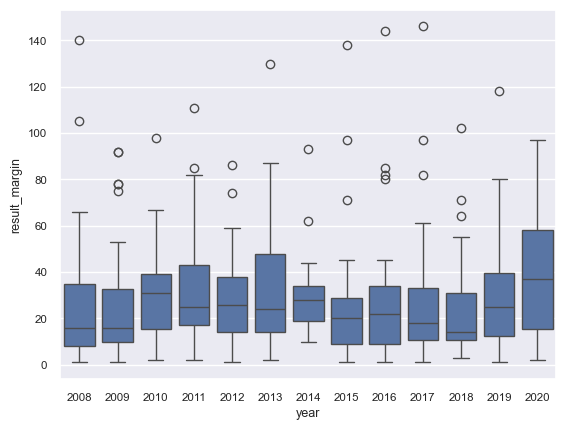

In [194]:
#Variation of result margin (runs) with year
df5 = df4[df4['result'] == 'runs']
sns.boxplot(df5, x = 'year',y = 'result_margin')

<Axes: xlabel='year', ylabel='result_margin'>

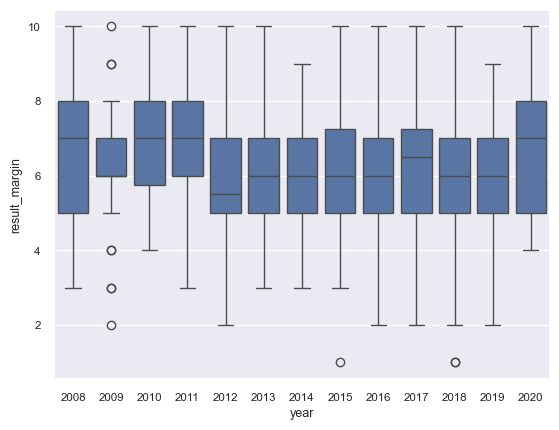

In [195]:
#Variation of result margin (wickets) with year 
df6 = df4[df4['result'] == 'wickets']
sns.boxplot(df6, x = 'year',y = 'result_margin')

In [196]:
#Number of matches played in a city
city_data = df.groupby('city')['id'].agg('count').sort_values(ascending = False)
city_data = city_data.to_frame().reset_index()
city_data

,city,id
0,Mumbai,100
1,Kolkata,77
2,Delhi,72
3,Hyderabad,63
4,Bangalore,62
5,Chandigarh,56
6,Chennai,56
7,Jaipur,47
8,Pune,38
9,Abu Dhabi,27


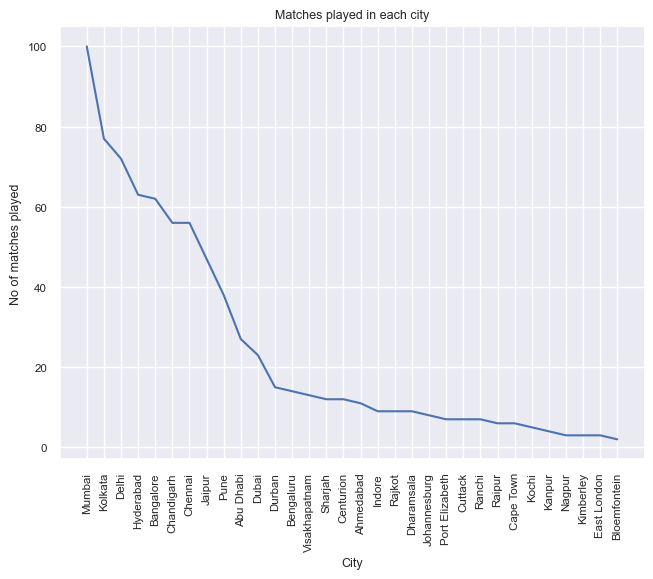

In [197]:
#Plotting line graph to represent number of matches played in a city
sns.set(font_scale=.75)
splot = sns.relplot(city_data, x = 'city', y = 'id', kind = 'line',height = 5, aspect = 4/3)
splot.set_xticklabels(rotation=90)
splot.set(xlabel ="City", ylabel = "No of matches played", title ='Matches played in each city')

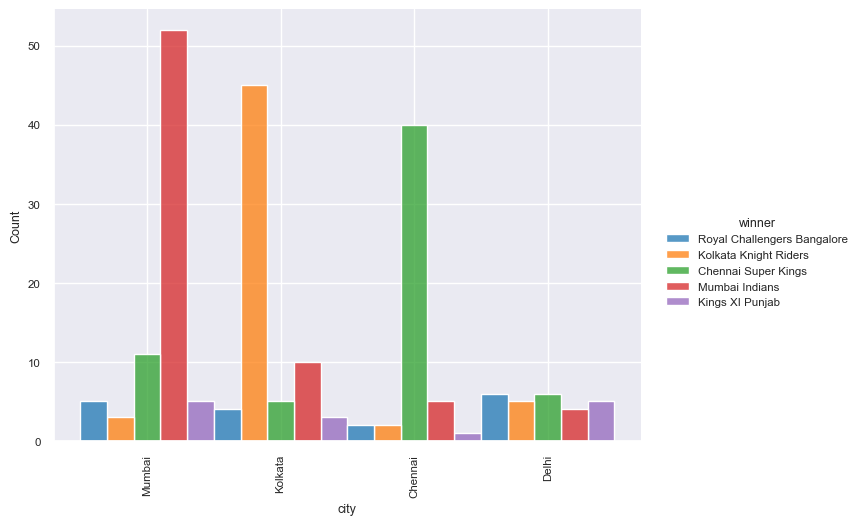

In [198]:
#No of times a team has won in a city (Using selective values)
dis_df = df[df['city'].isin(['Mumbai','Delhi','Kolkata','Chennai']) & df['winner'].isin(['Chennai Super Kings','Mumbai Indians','Royal Challengers Bangalore','Kings XI Punjab','Kolkata Knight Riders'])]
displot = sns.displot(data = dis_df, x='city',hue = 'winner', palette = 'tab10',multiple = 'dodge', height = 5, aspect = 4/3)
displot.set_xticklabels(rotation=90)
#plt.figure(figsize=(15,8))

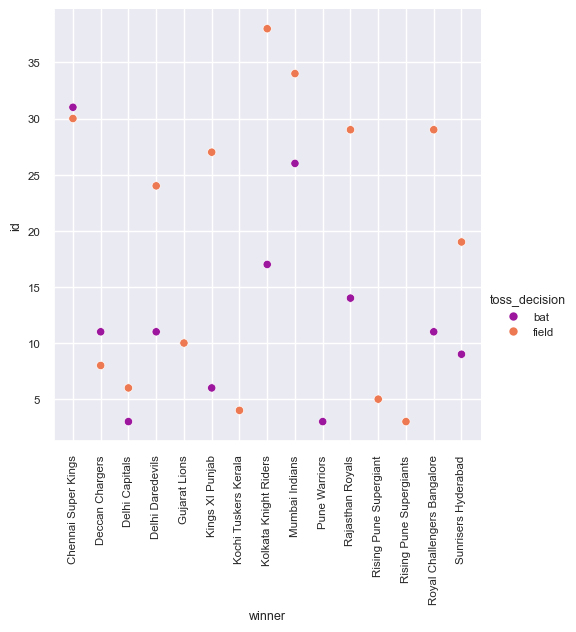

In [204]:
#Scatter plot of toss decision taken by toss winners where the match was won by them 
tw1 = df[df['toss_winner'] == df['winner']]
toss_win = tw1.groupby(['winner','toss_decision'])['id'].agg('count')
toss_win = toss_win.to_frame().reset_index()
relplot = sns.relplot(data=toss_win, x="winner", y="id", hue = "toss_decision", palette = "plasma")
relplot.set_xticklabels(rotation=90)


In [200]:
#Creating a plot of win percentage of teams
team_data['toss_match_win_percent'] = (team_data['toss_and_match_won']/team_data['matches_played'])*100
team_data['win_percent'] = (team_data['matches_won']/team_data['matches_played'])*100
team_data = team_data.reset_index()

C:\Users\prana\AppData\Local\Temp\ipykernel_19752\1235992752.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(team_data, y="win_percent", x='index', palette = 'plasma')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Kolkata Knight Riders'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Delhi Daredevils'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Deccan Chargers'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Delhi Capitals'),
  Text(11, 0, 'Gujarat Lions'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Kochi Tuskers Kerala'),
  Text(14, 0, 'Rising Pune Supergiants')])

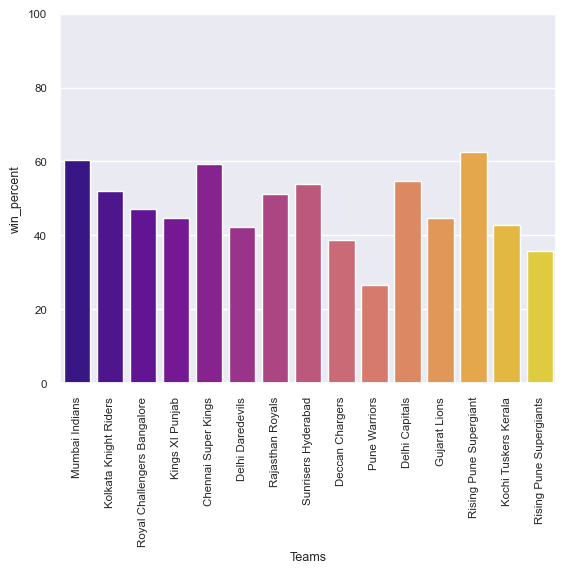

In [201]:
barplot2 = sns.barplot(team_data, y="win_percent", x='index', palette = 'plasma')
barplot2.set_xlabel('Teams')
plt.ylim(0,100)
plt.xticks(rotation=90)

C:\Users\prana\AppData\Local\Temp\ipykernel_19752\2683795083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(team_data, y="toss_match_win_percent", x='index', palette='plasma')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Kolkata Knight Riders'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Delhi Daredevils'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Deccan Chargers'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Delhi Capitals'),
  Text(11, 0, 'Gujarat Lions'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Kochi Tuskers Kerala'),
  Text(14, 0, 'Rising Pune Supergiants')])

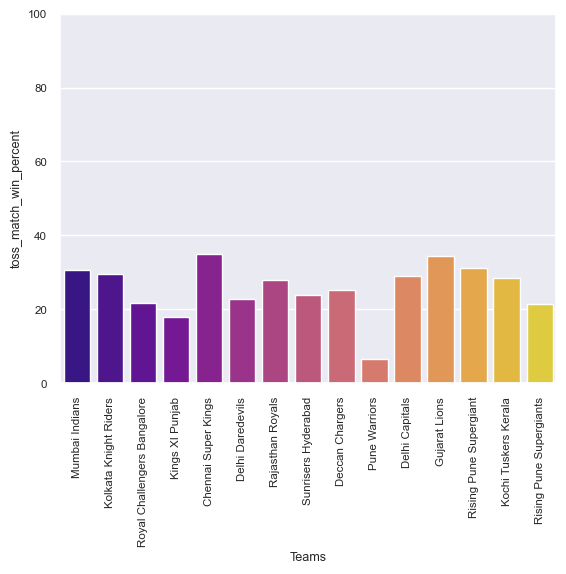

In [202]:
#Plot (Precentage of winning toss and match by a team)
barplot2 = sns.barplot(team_data, y="toss_match_win_percent", x='index', palette='plasma')
barplot2.set_xlabel('Teams')
plt.ylim(0,100)
plt.xticks(rotation=90)